### Figure 1
- schematic
- spectrogram for NSD and SD
- percentage sleep fraction during first 5h of POST for both SD and NSD sessions


In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])

import matplotlib.pyplot as plt
import numpy as np
import subjects

from plotters import violinplotx
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats
from subjects import (
    sns_boxplot_kw,
    stat_kw,
    sns_violin_kw,
)

stat_kw["loc"] = "inside"
grpdata = subjects.GroupData()
group = ["NSD", "SD"]

# SWA
# swa, swa_time, swa_states = grpdata.swa_examples.values()
# brainstates
states = grpdata.brainstates_proportion

# frate
frate = grpdata.frate_ratio_nsd_vs_sd
frate_chunks = grpdata.frate_post_chunks
frate_zscore = grpdata.frate_post_chunks_zscore

frate_change = grpdata.frate_change_pre_to_post
colors_frate_change = subjects.colors_sd()

ei_ratio_df = grpdata.ei_ratio

frate_quantiles = grpdata.frate_pre_to_maze_quantiles_in_POST
# frate_quantiles_shuffled= grpdata.frate_pre_to_maze_quantiles_in_POST_shuffled

plt.close()
fig = Fig(
    nrows=8,
    ncols=10,
    fontsize=5,
    constrained_layout=False,
    hspace=0.3,
    axis_lw=0.8,
    tick_size=2,
)

filename = subjects.figpath_sd / "figure1"

<Figure size 850x1100 with 0 Axes>

In [2]:
# # fr = frate[frate.neuron_type=='pyr']
# a = frate_chunks.groupby(["grp", "neuron_type", "zt"], sort=False).describe()[
#     "frate_log"
# ]
# a["iqr"] = a["75%"] - a["25%"]
# a

### Firing rate in 2.5 hour windows

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


pyr
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: p <= 5.00e-02

MAZE vs. 0-2.5: Wilcoxon test (paired samples), P_val:6.624e-05 Stat=3.805e+04
0-2.5 vs. 2.5-5: Wilcoxon test (paired samples), P_val:2.091e-07 Stat=3.483e+04
2.5-5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:1.693e-02 Stat=4.234e+04
0-2.5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:5.680e-06 Stat=3.658e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: p <= 5.00e-02

MAZE vs. 0-2.5: Wilcoxon test (paired samples), P_val:8.710e-01 Stat=2.416e+04
0-2.5 vs. 2.5-5: Wilcoxon test (paired samples), P_val:1.656e-01 Stat=2.220e+04
2.5-5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:2.398e-10 Stat=1.431e+04
0-2.5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:1.051e-09 Stat=1.468e+04
Object `fix` not found.
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: p <= 5.00e-02

2.5-5_NSD vs. 2.5-5_SD: Wilcoxon_ranksum, P_val:3.110e-01 Stat=-1.013e+00

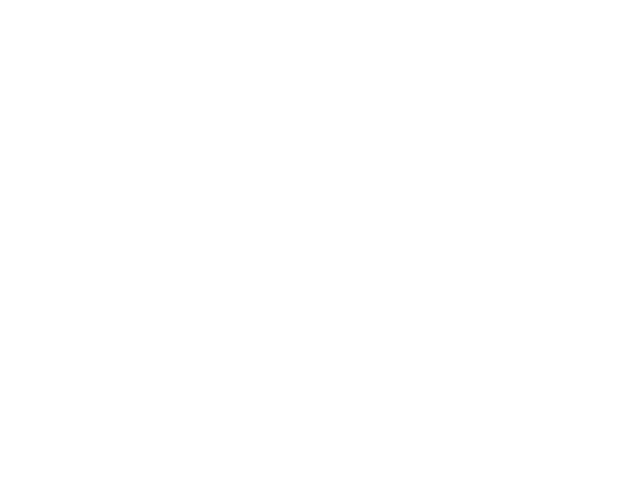

In [3]:
%matplotlib widget
from matplotlib import ticker
from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest

# ax1 = fig.subplot(fig.gs[3, :2])
# ax2 = fig.subplot(fig.gs[3, 2:4], sharey=ax1)
# axs = [ax1, ax2]
# subfig = fig.add_subfigure(fig.gs[3,2:5])
gs_ = fig.subplot2grid(
    fig.gs[2:4, :4], grid=(2, 3), width_ratios=[1.5, 1.5, 0.8], hspace=0.2, wspace=0.3
)

# ax1 = fig.subplot(gs_[:2])
# ax2 = fig.subplot(gs_[2:4])
# axs = [ax1, ax2]
frate_chunks["frate_log"] = np.log10(frate_chunks["frate"])

for i, n in enumerate(["pyr", "inter"]):
    print(n)
    df = frate_chunks[frate_chunks["neuron_type"] == n]

    for g, grp in enumerate(["NSD", "SD"]):
        ax = fig.subplot(gs_[i, g])

        plot_kw = dict(data=df[df.grp == grp], x="zt", y="frate_log", ax=ax)
        ax = violinplotx(**plot_kw, color=subjects.colors_sd()[g])
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.legend("", frameon=False)
        if n == "pyr":
            ax.set_ylim(-3, 2)

            # if i == 0:
            ax.set_yticks([-1, 0, 1])
            ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

        if n == "inter":
            ax.set_ylim(-1, 2.5)

            # if i == 0:
            ax.set_yticks([0, 1, 2])
            ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

        # stats
        stat_ax = ax.inset_axes([0, 0.9, 1, 0.2], sharex=ax)
        stat_ax.set_axis_off()
        plot_kw["ax"] = stat_ax
        plot_kw["y"] = "frate"
        orders = df.zt.unique()

        # Within groups
        pairs = [
            ("MAZE", "0-2.5"),
            ("0-2.5", "2.5-5"),
            ("2.5-5", "5-7.5"),
            ("0-2.5", "5-7.5"),
        ]

        annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
        annotator.configure(test="Wilcoxon", **stat_kw, color="k")
        annotator.apply_and_annotate()
        # annotator.apply_test().annotate(line_offset_to_group=k)
        annotator.reset_configuration()

        # pairs = [("0-2.5", "5-7.5")]
        # annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
        # annotator.configure(
        #     test="Levene", **stat_kw, color="k", comparisons_correction=None
        # )
        # annotator.apply_and_annotate()
        # # annotator.apply_test().annotate(line_offset_to_group=k)
        # annotator.reset_configuration()

    ax = fig.subplot(gs_[i, 2])

    df = df[df.zt.isin(["0-2.5", "2.5-5", "5-7.5"])]
    df.drop(df[(df.zt == "0-2.5") & (df.grp == "SD")].index, inplace=True)
    df.drop(df[(df.zt == "5-7.5") & (df.grp == "NSD")].index, inplace=True)
    df.loc[(df.zt == "0-2.5") & (df.grp == "NSD"), "zt"] = "0-2.5 vs 5-7.5"
    df.loc[(df.zt == "5-7.5") & (df.grp == "SD"), "zt"] = "0-2.5 vs 5-7.5"

    plot_kw = dict(
        # data=df[df.zt.isin(["2.5-5", "5-7.5"])],
        data=df,
        x="zt",
        y="frate_log",
        hue="grp",
        hue_order=group,
        ax=ax,
    )
    % NRK fix?
    # ax = violinplot(**plot_kw)
    ax = violinplotx(**plot_kw)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.legend("", frameon=False)

    if i == 0:
        ax.set_ylabel("Firing rate (Hz)")
    ax.tick_params("x", labelrotation=30)

    if n == "pyr":
        ax.set_ylim(-3, 2)

        # if i == 0:
        ax.set_yticks([-1, 0, 1])
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

    if n == "inter":
        ax.set_ylim(-1, 2.5)

        # if i == 0:
        ax.set_yticks([0, 1, 2])
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

    # stats
    stat_ax = ax.inset_axes([0, 0.9, 1, 0.2], sharex=ax)
    stat_ax.set_axis_off()
    plot_kw["y"] = "frate"
    plot_kw["ax"] = stat_ax
    orders = plot_kw["data"].zt.unique()

    # Across groups
    # pairs = [((_, "NSD"), (_, "SD")) for _ in orders] + [
    #     (("2.5-5", "NSD"), ("5-7.5", "SD"))
    # ]

    pairs = [
        (("2.5-5", "NSD"), ("2.5-5", "SD")),
        (("0-2.5 vs 5-7.5", "NSD"), ("0-2.5 vs 5-7.5", "SD")),
    ]

    custom_long_name = "Wilcoxon_ranksum"
    custom_short_name = "Wilcoxon_ranksum"
    custom_func = stats.ranksums
    custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

    annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
    # stat_kw['loc']='inside'
    # stat_kw['text_offset']=0.02
    # stat_kw['verbose']=False
    annotator.configure(
        test=custom_test, **stat_kw, color="k", comparisons_correction=None
    )
    annotator.apply_and_annotate()
    annotator.reset_configuration()

### Normality test for firing rate distributions

In [5]:
from statsmodels.stats import stattools

for g, grp in enumerate(["NSD", "SD"]):
    print(grp)
    fr = frate_chunks[
        (frate_chunks.grp == grp)
        & (frate_chunks.zt == "2.5-5")
        & (frate_chunks.neuron_type == "pyr")
    ]
    # print(stats.anderson(fr.frate_log.values),stats.shapiro(fr.frate_log.values))
    print(stats.shapiro(fr.frate_log.values))
# stattools.jarque_bera(fr.frate_log.values),stats.normaltest(fr.frate_log.values)

NSD
ShapiroResult(statistic=0.9959875345230103, pvalue=0.3274606764316559)
SD
ShapiroResult(statistic=0.9877312183380127, pvalue=0.00960448756814003)


### Zscored firing rate in 2.5 hour windows

In [6]:
from matplotlib import ticker
from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest

# ax1 = fig.subplot(fig.gs[3, :2])
# ax2 = fig.subplot(fig.gs[3, 2:4], sharey=ax1)
# axs = [ax1, ax2]
# subfig = fig.add_subfigure(fig.gs[3,2:5])
gs_ = fig.subplot2grid(
    fig.gs[2:4, 5:9], grid=(2, 3), width_ratios=[1.5, 1.5, 0.8], hspace=0.2, wspace=0.3
)

# ax1 = fig.subplot(gs_[:2])
# ax2 = fig.subplot(gs_[2:4])
# axs = [ax1, ax2]

for i, n in enumerate(["pyr", "inter"]):
    print(n)
    df = frate_zscore[frate_zscore["neuron_type"] == n]

    for g, grp in enumerate(["NSD", "SD"]):
        ax = fig.subplot(gs_[i, g])

        plot_kw = dict(data=df[df.grp == grp], x="zt", y="frate_zscore", ax=ax)
        ax = violinplotx(**plot_kw, color=subjects.colors_sd()[g])
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.legend("", frameon=False)
        if n == "pyr":
            ax.set_ylim(-3, 4)

            # if i == 0:
            # ax.set_yticks([-2, 0, 2])

        if n == "inter":
            ax.set_ylim(-3, 4)

            # if i == 0:
            # ax.set_yticks([-2, 0, 2])

        # stats
        orders = df.zt.unique()

        # Within groups
        pairs = [
            ("MAZE", "0-2.5"),
            ("2.5-5", "5-7.5"),
            ("0-2.5", "5-7.5"),
        ]

        stat_ax = ax.inset_axes([0, 0.9, 1, 0.2], sharex=ax)
        stat_ax.set_axis_off()
        plot_kw["ax"] = stat_ax
        annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
        annotator.configure(test="Wilcoxon", **stat_kw, color="k")
        annotator.apply_and_annotate()
        # annotator.apply_test().annotate(line_offset_to_group=k)
        annotator.reset_configuration()

        # pairs = [("0-2.5", "5-7.5")]
        # annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
        # annotator.configure(
        #     test="Levene", **stat_kw, color="k", comparisons_correction=None
        # )
        # annotator.apply_and_annotate()
        # annotator.apply_test().annotate(line_offset_to_group=k)
        # annotator.reset_configuration()

    ax = fig.subplot(gs_[i, 2])
    stat_ax = ax.inset_axes([0, 0.9, 1, 0.2], sharex=ax)
    stat_ax.set_axis_off()
    plot_kw = dict(
        data=df[df.zt.isin(["2.5-5", "5-7.5"])],
        x="zt",
        y="frate_zscore",
        hue="grp",
        hue_order=group,
        ax=ax,
    )
    % NRK fix?
    # ax = violinplot(**plot_kw)
    ax = violinplotx(**plot_kw)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.legend("", frameon=False)

    plot_kw["ax"] = stat_ax
    if i == 0:
        ax.set_ylabel("Firing rate (z-scored)")
    ax.tick_params("x", labelrotation=30)

    # if n == "pyr":
    #     ax.set_ylim(-3, 4)

    #     # if i == 0:
    #     ax.set_yticks([-2, 0, 2])

    # if n == "inter":
    #     ax.set_ylim(-3, 4)

    #     # if i == 0:
    #     ax.set_yticks([-2, 0, 2])

    # stats
    orders = plot_kw["data"].zt.unique()

    # Across groups
    pairs = [((_, "NSD"), (_, "SD")) for _ in orders] + [
        (("2.5-5", "NSD"), ("5-7.5", "SD"))
    ]

    custom_long_name = "Wilcoxon_ranksum"
    custom_short_name = "Wilcoxon_ranksum"
    custom_func = stats.ranksums
    custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

    annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
    annotator.configure(
        test=custom_test, **stat_kw, color="k", comparisons_correction=None
    )
    annotator.apply_and_annotate()
    annotator.reset_configuration()

pyr
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: p <= 5.00e-02

MAZE vs. 0-2.5: Wilcoxon test (paired samples), P_val:2.090e-01 Stat=4.537e+04
2.5-5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:6.484e-02 Stat=4.379e+04
0-2.5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:3.762e-04 Stat=3.921e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: p <= 5.00e-02

MAZE vs. 0-2.5: Wilcoxon test (paired samples), P_val:5.208e-01 Stat=2.339e+04
2.5-5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:1.258e-04 Stat=1.830e+04
0-2.5 vs. 5-7.5: Wilcoxon test (paired samples), P_val:1.680e-02 Stat=2.060e+04
Object `fix` not found.
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: p <= 5.00e-02

5-7.5_NSD vs. 5-7.5_SD: Wilcoxon_ranksum, P_val:1.981e-01 Stat=1.287e+00
2.5-5_NSD vs. 2.5-5_SD: Wilcoxon_ranksum, P_val:1.542e-01 Stat=-1.425e+00
2.5-5_NSD vs. 5-7.5_SD: Wilcoxon_ranksum, P_val:6.405e-02 Stat=1.852e+00
inter
p-value

In [12]:
import matplotlib
print(matplotlib.matplotlib_fname())

/home/nkinsky/miniforge3/envs/NeuroPy/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

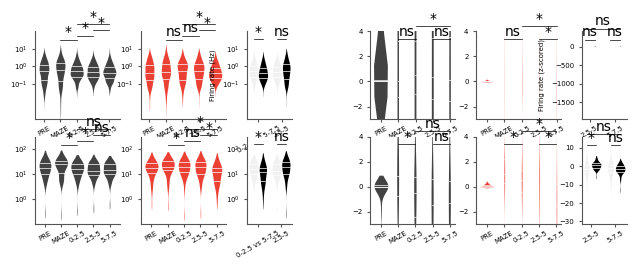

In [13]:
fig.fig

### saving

In [8]:
# fig.savefig(filename)